In [149]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

import uproot

In [33]:
main_folder = 'nd280-heavy-neutrino-search-2018_main/'
flux_filename = 'flux.npy'
eff_filename = 'efficiency.npy'

In [34]:
flux = np.load(main_folder+flux_filename)
eff = np.load(main_folder+eff_filename)

In [59]:
nd280_limits_marg = np.loadtxt(main_folder + 'limits_combined/limits_marginalisation.dat')
nd280_limits_prof = np.loadtxt(main_folder + 'limits_combined/limits_profiling.dat')
nd280_limits_single_A = np.loadtxt(main_folder + 'limits_single/Uee_method_A.dat')
nd280_limits_single_B = np.loadtxt(main_folder + 'limits_single/Uee_method_B.dat')
nd280_limits_single_C = np.loadtxt(main_folder + 'limits_single/Uee_method_C.dat')

nd280_limits_single = [nd280_limits_single_A, nd280_limits_single_B, nd280_limits_single_C]

In [6]:
masses = np.linspace(140, 490, 36)

In [74]:
channels = [1, 2, 6, 7]
modes = [3, 7, 27, 31]

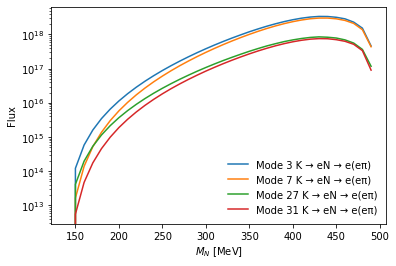

In [70]:
for mode in modes:
    plt.plot(masses, flux[:, mode], label=f'Mode {mode} K → eN → e(eπ)')
plt.xlabel(r'$M_N$ [MeV]')
plt.ylabel('Flux')
plt.legend(frameon=False)
plt.yscale('log')

In [208]:
def NegLogLike_epi(M_N, U_e4_2, channels=[1, 2, 6, 7]):
    log_like = 0
    n_events = []
    for channel in channels:
        beam_mode = channel >=5
        n_events.append((eff[:, :, channel] * flux[:, 24*beam_mode:24*(beam_mode+1)]).sum(axis=1))
    n_events = np.stack(n_events, axis=-1)[np.newaxis, ...]
    
    masses_grid, mixings_grid = np.meshgrid(M_N, U_e4_2)    
    n_events_grid = n_events * mixings_grid[..., np.newaxis]**2
    
    return masses_grid, mixings_grid, n_events_grid.sum(axis=-1)

Text(0.5, 1.0, 'Efficiency @ 150 MeV')

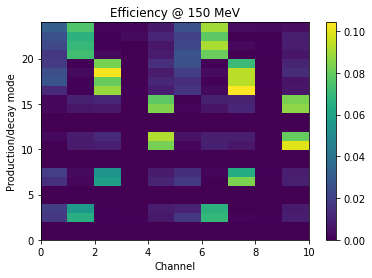

In [199]:
plt.pcolor(eff[2, :, :])
plt.colorbar()
plt.ylabel('Production/decay mode')
plt.xlabel('Channel')
plt.title('Efficiency @ 150 MeV')

In [209]:
mixings = np.geomspace(1e-10, 1, 50)
out_like = NegLogLike_epi(masses, mixings)

(140.0, 350.0)

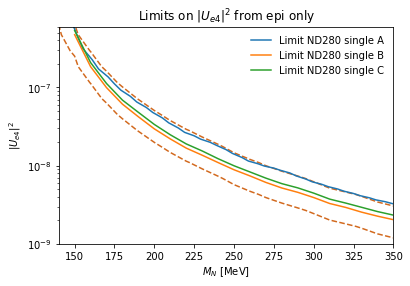

In [210]:
cont = plt.contour(*out_like, levels=[2.3, 15], 
                   colors=['chocolate'], 
                   linestyles=['dashed'])
plt.clabel(cont, levels=[2.3], inline=1, fontsize=10)
    
for method, nd280_limit in zip(['A', 'B', 'C'], nd280_limits_single):
    plt.plot(nd280_limit[:, 0], nd280_limit[:, 1], label=f'Limit ND280 single {method}')

plt.yscale('log')
plt.xlabel(r'$M_N$ [MeV]')
plt.ylabel(r'$|U_{e 4}|^2$')
plt.title('Limits on $|U_{e4}|^2$ from epi only')
plt.legend(frameon=False, loc='upper right')
plt.ylim(1e-9, 6e-7)
plt.xlim(140, 350)

In [215]:
out_like[2][:, 0]

array([5.34767072e-08, 1.36876195e-07, 3.50341180e-07, 8.96715040e-07,
       2.29518512e-06, 5.87463630e-06, 1.50364131e-05, 3.84864200e-05,
       9.85078364e-05, 2.52135528e-04, 6.45352967e-04, 1.65181185e-03,
       4.22789158e-03, 1.08214911e-02, 2.76981251e-02, 7.08946785e-02,
       1.81458327e-01, 4.64451284e-01, 1.18878532e+00, 3.04275300e+00,
       7.78807211e+00, 1.99339438e+01, 5.10218844e+01, 1.30592958e+02,
       3.34258935e+02, 8.55551763e+02, 2.18982574e+03, 5.60496392e+03,
       1.43461738e+04, 3.67197192e+04, 9.39858811e+04, 2.40561367e+05,
       6.15728347e+05, 1.57598621e+06, 4.03381223e+06, 1.03247357e+07,
       2.64266559e+07, 6.76402921e+07, 1.73128569e+08, 4.43130869e+08,
       1.13421470e+09, 2.90307687e+09, 7.43056437e+09, 1.90188856e+10,
       4.86797491e+10, 1.24598151e+11, 3.18914938e+11, 8.16278067e+11,
       2.08930283e+12, 5.34767072e+12])